# 학습 내용
- 모델 설계 및 학습
  - DNN
  - CNN
- 이미지 증강
- Dropout
- BatchNormalization
- GlobalAveragePooling2D
- 전이학습
  - 특징추출
  - 미세조정

- 구글 드라이브 연동

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 작업하고 있는 위치 변경
%cd /content/drive/MyDrive/Colab Notebooks/deeplearning_2025

/content/drive/MyDrive/Colab Notebooks/deeplearning_2025


- 이전 수업에서 전처리한 데이터를 불러오기

In [ ]:
import numpy as np

data = np.load("./data/np_cat_vs_dog.npz")

In [ ]:
data

NpzFile './data/np_cat_vs_dog.npz' with keys: X_train, X_test, y_train, y_test

- 훈련 데이터와 테스트 데이터를 가져온다

In [ ]:
X_train = data["X_train"]
X_test = data["X_test"]
y_train = data["y_train"]
y_test = data["y_test"]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2000, 224, 224, 3), (1000, 224, 224, 3), (2000,), (1000,))

# 실습
- 신경망 설계
  - 입력층, 은닉층 3개, 출력층
  - 은닉층의 units은 각각 256, 128, 64로 설정
- EarlyStopping 설정 : 기준 (val_accuracy), patience=5
- epochs=40, validation_split=0.3
- accuraccy, val_accuracy 시각화

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# 입력층
model1 = Sequential()
model1.add(InputLayer(input_shape=(224, 224, 3)))
model1.add(Flatten())   # 2차원 데이터 -> 1차원 데이터

# 은닉층
model1.add(Dense(units=256, activation="relu"))
model1.add(Dense(units=128, activation="relu"))
model1.add(Dense(units=64, activation="relu"))

# 출력층
model1.add(Dense(units=1, activation="sigmoid"))

model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    38,535,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,576,641 (147.16 MB)

 Trainable params: 38,576,641 (147.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# 학습중단
es = EarlyStopping(monitor="val_accuracy", patience=5)

# hist1에 dict형태로 accuracy, val_accuracy, loss, val_loss 키로 값이 저장
hist1 = model1.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[es])

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 733ms/step - accuracy: 0.5853 - loss: 425.0122 - val_accuracy: 0.0000e+00 - val_loss: 1544.4684
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 44s 811ms/step - accuracy: 0.6416 - loss: 327.4903 - val_accuracy: 0.7900 - val_loss: 38.2645
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 37s 710ms/step - accuracy: 0.6649 - loss: 107.9314 - val_accuracy: 0.0450 - val_loss: 525.0220
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 35s 785ms/step - accuracy: 0.7105 - loss: 95.5317 - val_accuracy: 0.0700 - val_loss: 368.1209
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 37s 709ms/step - accuracy: 0.6882 - loss: 110.4203 - val_accuracy: 0.0000e+00 - val_loss: 1218.9160
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 709ms/step - accuracy: 0.6344 - loss: 248.1361 - val_accuracy: 0.0700 - val_loss: 296.4696
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 709ms/step - accuracy: 0.6528 - loss: 129.2590 - val_accuracy: 0.0783 - val_loss: 206.4588


- 시각화

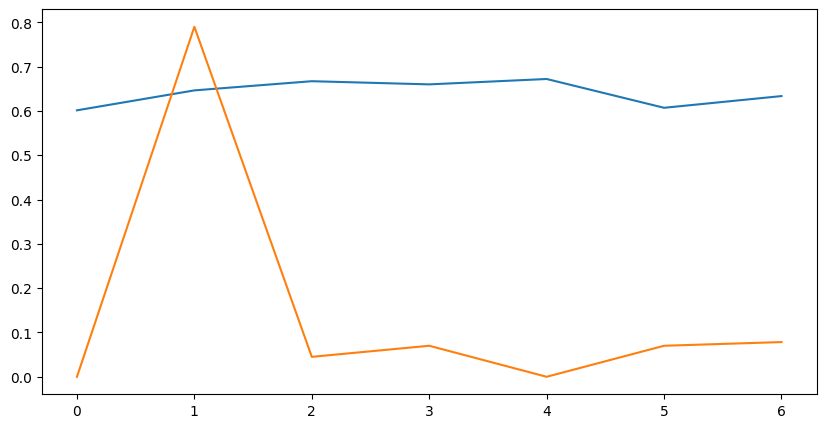

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(hist1.history["accuracy"], label="Train acc")
plt.plot(hist1.history["val_accuracy"], label="Validation acc")

plt.show()

# CNN을 사용하여 분류모델 제작

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

# Conv2D : 2차원 데이터(이미지)에서 특성을 추출하는 기능
# MaxPooling2D : 추출된 특성에서 중요한 특성만 선택하는 기능 (차원축소, 데이터 크기 감소)
#    중요한 특성 : 최대값(Max)을 선택

model2 = Sequential()

# 입력층
model2.add(InputLayer(input_shape=(224, 224, 3)))

# 특성 추출기 (CNN)
# 일반적으로 CCM, CCCM (0), CM(x)
model2.add(Conv2D(filters=32,    # 이미지 1개당 32개의 특성 이미지를 추출
                  kernel_size=(3,3),   # 특성 추출 도구
                  activation="relu",
                  padding = "same"))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=64,
                  kernel_size=(3,3),
                  activation="relu",
                  padding = "same"))
model2.add(MaxPooling2D(pool_size=(2,2)))

model2.add(Conv2D(filters=64,
                  kernel_size=(3,3),
                  activation="relu",
                  padding = "same"))
model2.add(MaxPooling2D(pool_size=(2,2)))

# 차원 1차원으로 변환
model2.add(Flatten())

# 분류기
model2.add(Dense(units=256, activation="relu"))
model2.add(Dense(units=128, activation="relu"))
model2.add(Dense(units=64, activation="relu"))

# 출력층
model2.add(Dense(units=1, activation="sigmoid"))

model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,942,849 (49.37 MB)

 Trainable params: 12,942,849 (49.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
es = EarlyStopping(monitor="val_accuracy", patience=5)

hist2 = model2.fit(X_train, y_train, epochs=2, validation_split=0.3, callbacks=[es])

Epoch 1/2
44/44 ━━━━━━━━━━━━━━━━━━━━ 155s 4s/step - accuracy: 0.7235 - loss: 0.5496 - val_accuracy: 0.0817 - val_loss: 1.4251
Epoch 2/2
44/44 ━━━━━━━━━━━━━━━━━━━━ 206s 4s/step - accuracy: 0.8059 - loss: 0.4445 - val_accuracy: 0.0117 - val_loss: 2.1116


- 증식 (증강 : Agumentation)를 이용한 학습
  - 데이터의 수가 적은 경우 데이터를 늘리는 방법
  - 원본 이미지에 확대/축소, 기울림, 회전, 이동변환, 색상변경 등을 적용하여 다양한 이미지를 새로 만드는 작업
  - 주의할점
    - 너무 크게 변해서 원본을 회손할 정도로 하면 안됨
    - 훈련 데이터에만 적용
    - 갯수를 300%이상 늘리는 증강은 비추천
  - 장점
    - 과소/과대 적합이 감소
    - 간단하게 성능을 향상 시킬 수 있는 방법
  - 단점
    - 가짜는 가짜다 -> 극적으로 성능이 향상되지는 않는다


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 데이터 경로
train_dir = "./data/cats_and_dogs_filtered/train"
test_dir = "./data/cats_and_dogs_filtered/validation"

| 옵션               | 설명                                                       |
|--------------------|------------------------------------------------------------|
| `rescale`          | 입력 이미지의 픽셀 값 재조정(ex.rescale=1.255 -> 모든 픽셀값들에 대해 0~1 사이로 정규화)|
| `rotation_range`   | 이미지의 회전 범위를 설정(ex.rotation_range -> -20~20도 사이에서 무작위로 회전)|
| `width_shift_range`| 이미지의 수평 이동 범위를 설정(ex.0.1은 전체 너비의 10%만큼 좌우로 무작위로 이동) |
| `height_shift_range`| 이미지의 수직 이동 범위를 설정(ex.0.1은 전체 너비의 10%만큼 위아래로 무작위로 이동)|
| `shear_range`      | 시계 반대 방향으로 지정된 각도만큼 변형       |
| `zoom_range`       | 이미지의 확대 및 축소 범위를 설정(ex.0.1 -> 0.9배~1.1배 사이에서 무작위로 확대하거나 축소) |
| `horizontal_flip`  | 이미지를 수평 방향으로 뒤집을지 여부를 설정       |
| `fill_mode`        | 이미지를 변형할 때 생기는 빈 공간을 채우는 방식을 설정(ex.nearest -> 가장 가까운 픽셀값을 사용하여 빈공간 채우기) |

In [ ]:
# 증식 설정
train_gen = ImageDataGenerator (
    rescale=1./255,         # 0-225 픽셀값을 0.0-1.0으로 정규화
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_gen = ImageDataGenerator(
    rescale=1./255.
)

In [ ]:
# 설정할 폴더로부터 데이터를 가져와서 처리
train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # 이미지들을 224x224 크기로 맞춤 (padding)
    batch_size=20,           # 한 번에 처리할 데이터 수
    class_mode="binary"      # 자동을 라벨링을 해줌 (사전순으로 0부터 부여), 다진분류 : categorical
)

test_generator = test_gen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # 이미지들을 224x224 크기로 맞춤 (padding)
    batch_size=20,           # 한 번에 처리할 데이터 수
    class_mode="binary"      # 자동을 라벨링을 해줌 (사전순으로 0부터 부여)
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# 라벨 확인 (클래스명의 사전순으로 0부터 부여)
print(train_generator.class_indices)
print(test_generator.class_indices)

{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


- 신경망 설계

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

# Conv2D : 2차원 데이터(이미지)에서 특성을 추출하는 기능
# MaxPooling2D : 추출된 특성에서 중요한 특성만 선택하는 기능 (차원축소, 데이터 크기 감소)
#    중요한 특성 : 최대값(Max)을 선택

model3 = Sequential()

# 입력층
model3.add(InputLayer(input_shape=(224, 224, 3)))

# 특성 추출기 (CNN)
# 일반적으로 CCM, CCCM (0), CM(x)
model3.add(Conv2D(filters=32,    # 이미지 1개당 32개의 특성 이미지를 추출
                  kernel_size=(3,3),   # 특성 추출 도구
                  activation="relu",
                  padding = "same"))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(filters=64,
                  kernel_size=(3,3),
                  activation="relu",
                  padding = "same"))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(filters=64,
                  kernel_size=(3,3),
                  activation="relu",
                  padding = "same"))
model3.add(MaxPooling2D(pool_size=(2,2)))

# 차원 1차원으로 변환
model3.add(Flatten())

# 분류기
model3.add(Dense(units=256, activation="relu"))
model3.add(Dense(units=128, activation="relu"))
model3.add(Dense(units=64, activation="relu"))

# 출력층
model3.add(Dense(units=1, activation="sigmoid"))

model3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,942,849 (49.37 MB)

 Trainable params: 12,942,849 (49.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model3.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
es = EarlyStopping(monitor="val_accuracy", patience=5)

hist3 = model3.fit(train_generator,
                   epochs=2,      #20
                   validation_data=test_generator,
                   callbacks=[es])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 982s 10s/step - accuracy: 0.5177 - loss: 0.7714 - val_accuracy: 0.4960 - val_loss: 0.6934
Epoch 2/2
100/100 ━━━━━━━━━━━━━━━━━━━━ 285s 3s/step - accuracy: 0.5342 - loss: 0.6927 - val_accuracy: 0.5090 - val_loss: 0.6836


- 시각화

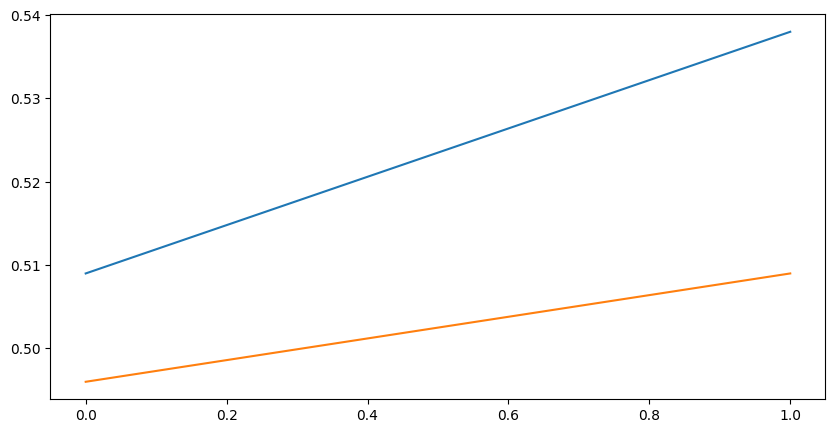

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(hist3.history["accuracy"], label="Train acc")
plt.plot(hist3.history["val_accuracy"], label="Validation acc")

plt.show()

# 전이학습 (Transfer Learning)
- 기존의 학습된 모델을 가져와서 사용하는 것
  - 전처리기만 가져와서 사용
    - 특성추출
    - 미세조정
  - 전처리기와 분류기를 모두 가져와서 사용

- 동결 : 가져온 전처리기의 가중치(w, b)가 오차역전파가 되지 않도록 막아 놓는 작업

<center>  
<img src="https://arome1004.cafe24.com/images/deeplearning/transferlearning.png" width=70%>   
</center>    

- 사전 학습된 모델 (VGG16) 가져오기

In [ ]:
from keras.applications import VGG16

# weights="imagenet" : 1000개의 클래스로 학습된 이미지 데이터의 가중치를 가져온다
# include_top = False : 전체 모델 중 전처리기(CNN층)만 가져온다
# input_shape=(224, 224, 3) : 우리의 입력 이미지 크기를 설정
conv_base = VGG16(weights="imagenet",
                  include_top = False,
                  input_shape=(224, 224, 3))

conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

- 가져온 모델을 우리가 설계한 모델에 연결하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

model4 = Sequential()

# 전처리기 (VGG16의 전처리기를 연결)
model4.add(conv_base)

# 차원 1차원으로 변환
model4.add(Flatten())

# 분류기
model4.add(Dense(units=256, activation="relu"))
model4.add(Dense(units=128, activation="relu"))
model4.add(Dense(units=64, activation="relu"))

# 출력층
model4.add(Dense(units=1, activation="sigmoid"))

model4.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,178,689 (80.79 MB)

 Trainable params: 21,178,689 (80.79 MB)

 Non-trainable params: 0 (0.00 B)

- 학습 가능한 층 출력

In [ ]:
print(f"학습 가능한 층의 수 : {len(model4.trainable_weights)}")
print(f"학습 안되는 층의 수 : {len(model4.non_trainable_weights)}")

# VGG16의 13개층 x 2 (w, b) - 26개
# 분류기의 4개층 x 2 (w, b) - 8개

학습 가능한 층의 수 : 34
학습 안되는 층의 수 : 0


- VGG16의 전처리기는 동결 (학습이 되지 않도록 설정)

In [ ]:
conv_base.trainable = False

In [ ]:
print(f"학습 가능한 층의 수 : {len(model4.trainable_weights)}")
print(f"학습 안되는 층의 수 : {len(model4.non_trainable_weights)}")

학습 가능한 층의 수 : 8
학습 안되는 층의 수 : 26


In [ ]:
model4.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# 학습중단
hist4 = model4.fit(X_train, y_train, epochs=2, validation_split=0.3)

Epoch 1/2
44/44 ━━━━━━━━━━━━━━━━━━━━ 1163s 27s/step - accuracy: 0.7957 - loss: 9.4738 - val_accuracy: 0.9467 - val_loss: 0.7143
Epoch 2/2
 4/44 ━━━━━━━━━━━━━━━━━━━━ 12:39 19s/step - accuracy: 0.9811 - loss: 0.0591

KeyboardInterrupt: 

- 시각화

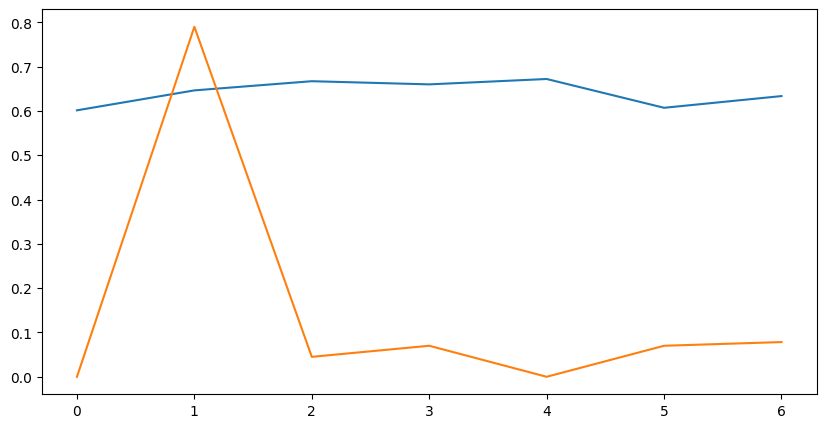

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(hist4.history["accuracy"], label="Train acc")
plt.plot(hist4.history["val_accuracy"], label="Validation acc")

plt.show()

# 미세 조정 방식의 전이학습

- 전처리기의 마지막까지 학습이 되도록 설정하는 것

In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

- block5_conv3 층까지만 학습이 되도록 설정

In [ ]:
print(f"학습 가능한 층의 수 : {len(model4.trainable_weights)}")
print(f"학습 안되는 층의 수 : {len(model4.non_trainable_weights)}")

학습 가능한 층의 수 : 8
학습 안되는 층의 수 : 26


In [ ]:
conv_base.trainable = True

In [ ]:
print(f"학습 가능한 층의 수 : {len(model4.trainable_weights)}")
print(f"학습 안되는 층의 수 : {len(model4.non_trainable_weights)}")

학습 가능한 층의 수 : 34
학습 안되는 층의 수 : 0


In [ ]:
for layer in model4.layers[0].layers:
  if layer.name == "block5_conv3":
    layer.trainable = True
  else :
    layer.trainable = False

In [ ]:
print(f"학습 가능한 층의 수 : {len(model4.trainable_weights)}")
print(f"학습 안되는 층의 수 : {len(model4.non_trainable_weights)}")

학습 가능한 층의 수 : 10
학습 안되는 층의 수 : 24


In [ ]:
model4.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# 학습중단
hist4 = model4.fit(X_train, y_train, epochs=2, validation_split=0.3)

Epoch 1/2
44/44 ━━━━━━━━━━━━━━━━━━━━ 1140s 26s/step - accuracy: 0.9126 - loss: 2.4649 - val_accuracy: 0.8083 - val_loss: 1.5563
Epoch 2/2
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 18s/step - accuracy: 0.9784 - loss: 0.1123 

KeyboardInterrupt: 

- 과적합 감소 기법
  - 데이터 수를 늘린다
  - 초기 가중치 값을 정규화한다
  - BatchNormalization를 사용한다
    - 활성화 함수로 ReLU를 쓰면 안됨 -> LeakyReLU 사용
    - 안되는 이유 : BatchNormalization로 정규화를 하면 음수값이 발생하는데 여기에 ReLU을 사용하면 음수정보가 사라지는 문제 -> 최적화된 파마미터 값을 회손하는 문제
  - GlobalAveragePooling을 사용한다
    - AveravagePooling + Flatten이 결합된 형태

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping

model5 = Sequential()

# 입력층
model5.add(InputLayer(input_shape=(224, 224, 3)))

# C + M -> C + BN + A + M
model5.add(Conv2D(filters=32,    # 이미지 1개당 32개의 특성 이미지를 추출
                  kernel_size=(3,3),   # 특성 추출 도구
                  padding = "same"))
model5.add(BatchNormalization())
model5.add(Activation(LeakyReLU()))
model5.add(MaxPooling2D(pool_size=(2,2)))

model5.add(Conv2D(filters=64,
                  kernel_size=(3,3),
                  padding = "same"))
model5.add(BatchNormalization())
model5.add(Activation(LeakyReLU()))
model5.add(MaxPooling2D(pool_size=(2,2)))

model5.add(Conv2D(filters=64,
                  kernel_size=(3,3),
                  padding = "same"))
model5.add(BatchNormalization())
model5.add(Activation(LeakyReLU()))

# M + F -> GlobalAveragePooling2D()
# model5.add(MaxPooling2D(pool_size=(2,2)))
# model5.add(Flatten())
model5.add(GlobalAveragePooling2D())

# 분류기
model5.add(Dense(units=256, activation="relu"))
model5.add(Dense(units=128, activation="relu"))
model5.add(Dense(units=64, activation="relu"))

# 출력층
model5.add(Dense(units=1, activation="sigmoid"))

model5.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 114,817 (448.50 KB)

 Trainable params: 114,497 (447.25 KB)

 Non-trainable params: 320 (1.25 KB)

In [ ]:
model5.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# 학습중단
es = EarlyStopping(monitor="val_accuracy", patience=5)

# hist1에 dict형태로 accuracy, val_accuracy, loss, val_loss 키로 값이 저장
hist5 = model5.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[es])

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 33s 733ms/step - accuracy: 0.5853 - loss: 425.0122 - val_accuracy: 0.0000e+00 - val_loss: 1544.4684
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 44s 811ms/step - accuracy: 0.6416 - loss: 327.4903 - val_accuracy: 0.7900 - val_loss: 38.2645
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 37s 710ms/step - accuracy: 0.6649 - loss: 107.9314 - val_accuracy: 0.0450 - val_loss: 525.0220
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 35s 785ms/step - accuracy: 0.7105 - loss: 95.5317 - val_accuracy: 0.0700 - val_loss: 368.1209
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 37s 709ms/step - accuracy: 0.6882 - loss: 110.4203 - val_accuracy: 0.0000e+00 - val_loss: 1218.9160
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 709ms/step - accuracy: 0.6344 - loss: 248.1361 - val_accuracy: 0.0700 - val_loss: 296.4696
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 41s 709ms/step - accuracy: 0.6528 - loss: 129.2590 - val_accuracy: 0.0783 - val_loss: 206.4588
